In [1]:
#from transformers import BertTokenizer, TFBertForMaskedLM
from transformers import *
import tensorflow as tf
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer# initialize our tokenizer with the Portuguese spaCY one
from spellchecker import SpellChecker
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import glob

2023-04-20 19:07:29.536041: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 19:07:29.628268: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-20 19:07:30.078812: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/larkinan/miniconda3/envs/tf/lib/:/home/larkinan/miniconda3/envs/tf/l

In [2]:
def spacy_tokenizer(document):
    # tokenize the document with spaCY
    doc = nlp(document)
    # Remove stop words and punctuation symbols
    tokens = [
        token.text for token in doc if (
        token.is_stop == False and \
        token.is_punct == False and \
        token.text.strip() != '' and \
        token.text.find("\n") == -1)]
    return tokens

In [3]:
def clean_text(line):
    line = re.sub(r'-+',' ',line)
    line = re.sub(r'[^a-zA-Z, ]+'," ",line)
    line = re.sub(r'[ ]+'," ",line)
    line += "."
    return line

In [4]:
def screenNewWords(tokenizer,newWords):
    screenedList = list( filter((lambda x: check(x)==False and x not in tokenizer.vocab), newWords))
    return screenedList

In [5]:
def check(word):
    if word == spell.correction(word):
        return True
    else:
        return False

In [8]:
import pandas as ps
newTokens = list(ps.read_csv("/mnt/h/Aspire/BERT/emojis/emojiList.csv")['emojis'])
newTokens

['😂',
 '❤',
 '😭',
 '😍',
 '🎉',
 '😊',
 '😘',
 '😩',
 '💕',
 '🏽',
 '🏼',
 '🏾',
 '💯',
 '🔥',
 '🏻',
 '🙏',
 '🙌',
 '🤣',
 '😒',
 '💙',
 '♀',
 '🙄',
 '😁',
 '👏',
 '☺',
 '💀',
 '👌',
 '🎈',
 '💜',
 '💗',
 '😅',
 '💖',
 '🤔',
 '😎',
 '♂',
 '😔',
 '🤦',
 '🙃',
 '👍',
 '🤷',
 '✨',
 '😏',
 '🎶',
 '🎂',
 '💪',
 '💛',
 '😌',
 '🎊',
 '😳',
 '👀',
 '😉',
 '😢',
 '‼',
 '😋',
 '💔',
 '💘',
 '✌',
 '♥',
 '😈',
 '😴',
 '🥰',
 '💋',
 '💞',
 '🤗',
 '🥺',
 '💚',
 '🎁',
 '✊',
 '😑',
 '😫',
 '😜',
 '💁',
 '💓',
 '😡',
 '😐',
 '🤘',
 '😕',
 '😤',
 '☀',
 '😄',
 '😛',
 '🙈',
 '😞',
 '😻',
 '🍻',
 '🏀',
 '😬',
 '😇',
 '🖤',
 '😪',
 '🏈',
 '🙂',
 '👑',
 '💃',
 '😆',
 '🚨',
 '👊',
 '😀',
 '😃',
 '😝',
 '🥳',
 '😷']

In [13]:
def saveBaseModel(saveModel,inToken):
    inToken.save_pretrained(f"{'expandedTokenBase'}")
    saveModel.save_pretrained(f"{'expandedModelBase'}")

In [14]:
def updateTokenizer2():
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = TFBertForMaskedLM.from_pretrained('bert-base-uncased')
    #tokenizer = BertTokenizer.from_pretrained('testToken1')
    #model = TFBertForMaskedLM.from_pretrained('testModel1')
    newTokens = list(ps.read_csv("/mnt/h/Aspire/BERT/emojis/emojiList.csv")['emojis'])
    added_tokens = tokenizer.add_tokens(newTokens)
    print("tokenizer vocab size: %i \n added tokens: %i" %(len(tokenizer),added_tokens))
    
    # resize the embeddings matrix of the model 
    model.resize_token_embeddings(len(tokenizer))
    saveBaseModel(model,tokenizer)
updateTokenizer2()

loading file vocab.txt from cache at /home/larkinan/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /home/larkinan/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer_config.json
loading configuration file config.json from cache at /home/larkinan/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_

tokenizer vocab size: 30623 
 added tokens: 101


Model weights saved in expandedModelBase/tf_model.h5


In [6]:
def identifyNewTokens(inFile):
    # apply spaCY tokenizer through scikit-learn
    # https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting
    tfidf_vectorizer = TfidfVectorizer(
        lowercase=False, 
        tokenizer=spacy_tokenizer, 
        norm='l2', 
        use_idf=True, 
        smooth_idf=True, 
        sublinear_tf=False
    )
    
    # parse matrix of tfidf
    length = len(inFile)
    result = tfidf_vectorizer.fit_transform(inFile)

    # get idf of tokens
    idf = tfidf_vectorizer.idf_

    # get tokens from most frequent in documents to least frequent
    idf_sorted_indexes = sorted(range(len(idf)), key=lambda k: idf[k])
    idf_sorted = idf[idf_sorted_indexes]
    
    tokens_by_df = np.array(tfidf_vectorizer.get_feature_names_out())[idf_sorted_indexes]
    # choose the proportion of new tokens to add in vocabulary
    pct = 1 # all tokens present in at least 1%


    index_max = len(np.array(idf)[np.array(idf)>=pct])
    newTokens = tokens_by_df[:index_max]
    newTokens = list(set(newTokens))
    return(newTokens)

In [8]:
spell = SpellChecker()
# define spaCY tokenizer
nlp = spacy.load(
    "en_core_web_lg", 
    exclude=['morphologizer', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']
    )
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

folder = '/mnt/h/Aspire/BERT/BERT_text/'
tweetFiles = glob.glob(folder + "txt_*")
print(tweetFiles)
with open(tweetFiles[0],'r') as f:
    file = f.read().split("\n")
print(file[0:5])

#newTokens = identifyNewTokens(file)

#newTokens = screenNewWords(tokenizer,newTokens)
#newTokens = newTokens[:100]
#model,tokenizer,newTokens = createCustomTokenizer(newTokens,debug=True)
#inputs = setupModelInputs(tokenizer,file,debug=True)


loading file vocab.txt from cache at /home/larkinan/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /home/larkinan/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer_config.json
loading configuration file config.json from cache at /home/larkinan/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_

['/mnt/h/Aspire/BERT/BERT_text/txt_2014_age.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2014_env.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2014_health.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2014_health2.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2014_place.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2015_age.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2015_env.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2015_health.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2015_health2.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2015_place.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2016_age.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2016_env.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2016_health.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2016_health2.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2016_place.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2017_age.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2017_env.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2017_health.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_2017_health2.txt', '/mnt/h/Aspire/BERT/BERT_text/txt_

In [ ]:
newTokens = identifyNewTokens(file)
newTokens = screenNewWords(tokenizer,newTokens)
newTokens = newTokens[:100]

In [7]:
def mapInputIds(inp):
    actual_tokens = list(set(range(100)) - set(np.where((inp == 101) | (inp == 102) | (inp == 0))[0].tolist()))
    #We need to select 15% random tokens from the given list
    num_of_token_to_mask = int(len(actual_tokens)*0.15)
    token_to_mask = np.random.choice(np.array(actual_tokens), size=num_of_token_to_mask, replace=False).tolist()
    #Now we have the indices where we need to mask the tokens
    inp[token_to_mask] = 103
    return(inp)

In [8]:
def createCustomTokenizer(newWordList,debug=False):
    # import a model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = TFBertForMaskedLM.from_pretrained('bert-base-uncased')
    #tokenizer = BertTokenizer.from_pretrained('testToken1')
    #model = TFBertForMaskedLM.from_pretrained('testModel1')
    
    newTokens = screenNewWords(tokenizer,newWordList)
    newTokens = newTokens[:100]

    ## add new tokens to the existing vocabulary (only those not already presents)
    added_tokens = tokenizer.add_tokens(newTokens)
    if(debug):
        print("tokenizer vocab size: %i \n added tokens: %i" %(len(tokenizer),added_tokens))
    
    # resize the embeddings matrix of the model 
    model.resize_token_embeddings(len(tokenizer))
    return(model,tokenizer,newTokens)

In [12]:
def setupModelInputs(tokenizer,inFile,debug=False):
    inputs = tokenizer(file,max_length=100,truncation=True,padding='max_length',return_tensors='tf')
    inputs['labels'] = inputs['input_ids']
    if debug: 
        print(inputs.keys())
    inp_ids = list(map(mapInputIds,inputs.input_ids.numpy()))
    inp_ids = tf.convert_to_tensor(inp_ids)
    inputs['input_ids'] = inp_ids

    return(inputs)

The Hunger Games


The Hunger Games 1by Suzanne Collins

PART I"THE TRIBUTES"

1


/home/larkinan/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
loading file vocab.txt from cache at /home/larkinan/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /home/larkinan/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer_config.json
loading configuration file config.json from cache at /home/larkinan/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "

tokenizer vocab size: 30571 
 added tokens: 49
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history = model.fit([inputs.input_ids,inputs.attention_mask],inputs.labels,verbose=1,batch_size=32,epochs=2)
print(model)

Epoch 1/2
39/39 [==============================] - 23s 102ms/step - loss: 0.0116
Epoch 2/2
39/39 [==============================] - 4s 97ms/step - loss: 0.0045


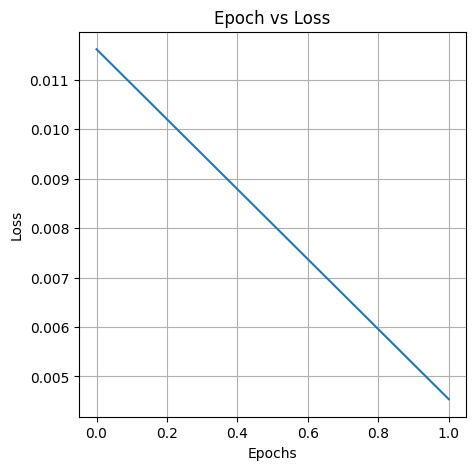

In [31]:
losses = history.history['loss']
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(range(len(losses)),losses)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Epoch vs Loss")
plt.grid()
plt.show()

In [32]:
query = "Good morning [MASK], have a [MASK] day"
inp = tokenizer(query,return_tensors='tf')
mask_loc = np.where(inp.input_ids.numpy()[0] == 103)[0].tolist()
out = model(inp).logits[0].numpy()
predicted_tokens = np.argmax(out[mask_loc],axis=1).tolist()
tokenizer.decode(predicted_tokens)
#outputs

'everyone good'

In [33]:
def saveModel(saveModel,inToken,folder,iteration):
    inToken.save_pretrained(f"{'testToken' + str(iteration)}")
    saveModel.save_pretrained(f"{'testModel' + str(iteration)}")

In [34]:
saveModel(model,tokenizer,'a',1)

tokenizer config file saved in testToken1/tokenizer_config.json
Special tokens file saved in testToken1/special_tokens_map.json
added tokens file saved in testToken1/added_tokens.json
Configuration saved in testModel1/config.json
Model weights saved in testModel1/tf_model.h5


In [35]:
#from tensorflow.keras.preprocessing.sequence import pad_sequences
def buildModel():
    MAX_SEQ_LEN = 100
    t_i = tf.keras.layers.Input((MAX_SEQ_LEN), dtype=tf.int32, name='text')
    m_i = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype=tf.int32, name='a')
    s_i = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype=tf.int32, name='b')
    btok = TFBertModel.from_pretrained('testModel1')
    output = btok([t_i,m_i,s_i])
    print(output)
    a = tf.keras.layers.Dense(1,activation='softmax')(output['last_hidden_state'])
    a = tf.keras.layers.Dense(1,activation='softmax')(output['pooler_output'])
    bm2 = tf.keras.Model([t_i,m_i,s_i],a)
    bm2.summary()
    return(bm2)

In [36]:
bm2 = buildModel()
bm2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="binary_crossentropy")

loading configuration file testModel1/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30571
}

loading weights file testModel1/tf_model.h5
Some layers from the model checkpoint at testModel1 were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architec

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<KerasTensor: shape=(None, 100, 768) dtype=float32 (created by layer 'tf_bert_model_1')>, pooler_output=<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_bert_model_1')>, past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 a (InputLayer)                 [(None, 100)]        0           []                               
                                                                                                  
 b (InputLayer)                 [(None, 100)]        

In [37]:
#print(inputs['input_ids'])
#print(inputs['token_type_ids'])
print(inputs['attention_mask'])
#print(inputs['labels'])
e =  tf.convert_to_tensor(np.ones((1226,1)))
print(e)
#print(inputs['labels'][:,1]).reshape(1226,1)

tf.Tensor(
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]], shape=(1226, 100), dtype=int32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]], shape=(1226, 1), dtype=float64)


In [38]:
bm2.fit({
    'text':inputs['input_ids'],
    'a':inputs['token_type_ids'],
    'b':inputs['attention_mask']},e)

39/39 [==============================] - 23s 135ms/step - loss: 0.0198


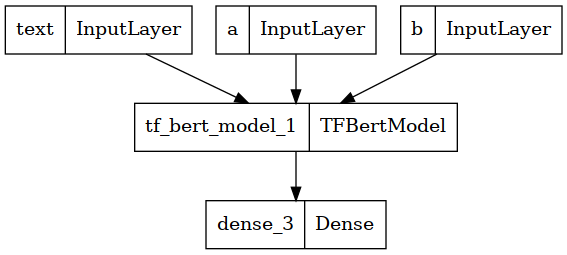

In [39]:
tf.keras.utils.plot_model(bm2)